# Upload File

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("USvideos_modified.csv", sep=",")

# General Clean up of Data

In [2]:
#filling in descriptions that were blank
df.description= df.description.fillna('No description provided')
df.tags= df.tags.fillna('')
df = df.dropna() #no information provided for subscribers to we eliminate those rows
df.shape

(4525, 23)

In [3]:
df.head(10)

,video_id,last_trending_date,publish_date,publish_hour,category_id,channel_title,views,likes,dislikes,comment_count,...,tag_appeared_in_title,title,tags,description,trend_day_count,trend.publish.diff,trend_tag_highest,trend_tag_total,tags_count,subscriber
0,2kyS6SvSYSE,2017-11-20,2017-11-13,17,22,CaseyNeistat,2564903,96321,7972,22149,...,False,WE WANT TO TALK ABOUT OUR MARRIAGE,SHANtell martin,SHANTELL'S CHANNEL - https://www.youtube.com/s...,7,7,2,2,1,9086142.0
1,1ZAPwfrtAFY,2017-11-20,2017-11-13,7,24,LastWeekTonight,6109402,151250,11508,19820,...,False,The Trump Presidency: Last Week Tonight with J...,last week tonight trump presidency|last week t...,"One year after the presidential election, John...",7,7,65,69,4,5937292.0
2,5qpjK5DgCt4,2017-11-20,2017-11-12,19,23,Rudy Mancuso,5315471,187303,7278,9990,...,True,"Racist Superman | Rudy Mancuso, King Bach & Le...",racist superman|rudy|mancuso|king|bach|racist|...,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,7,8,68,426,23,4191209.0
3,puqaWrEC7tY,2017-11-20,2017-11-13,11,24,Good Mythical Morning,913268,16729,1386,2988,...,True,Nickelback Lyrics: Real or Fake?,rhett and link|gmm|good mythical morning|rhett...,Today we find out if Link is a Nickelback amat...,7,7,488,1246,28,13186408.0
4,d380meD0W0M,2017-11-19,2017-11-12,18,24,nigahiga,2819118,153395,2416,20573,...,True,I Dare You: GOING BALD!?,ryan|higa|higatv|nigahiga|i dare you|idy|rhpc|...,I know it's been a while since we did this sho...,6,7,488,1007,14,20563106.0
5,gHZ1Qz0KiKM,2017-11-20,2017-11-13,19,28,iJustine,1038365,22594,2798,3142,...,True,2 Weeks with iPhone X,ijustine|week with iPhone X|iphone x|apple|iph...,Thanks for watching! Don't forget to subscribe...,7,7,38,122,7,4652602.0
6,39idVpFF7NQ,2017-11-18,2017-11-12,5,24,Saturday Night Live,2688797,19042,3059,2689,...,True,Roy Moore & Jeff Sessions Cold Open - SNL,SNL|Saturday Night Live|SNL Season 43|Episode ...,Embattled Alabama Senate candidate Roy Moore (...,5,6,488,2216,42,5292034.0
7,nc99ccSXST0,2017-11-19,2017-11-12,21,28,CrazyRussianHacker,1251577,28951,1146,2606,...,True,5 Ice Cream Gadgets put to the Test,5 Ice Cream Gadgets|Ice Cream|Cream Sandwich M...,Ice Cream Pint Combination Lock - http://amzn....,6,7,113,180,13,10474796.0
8,jr9QtXwC9vc,2017-11-15,2017-11-13,14,1,20th Century Fox,2671756,12699,505,1010,...,True,The Greatest Showman | Official Trailer 2 [HD]...,Trailer|Hugh Jackman|Michelle Williams|Zac Efr...,"Inspired by the imagination of P.T. Barnum, Th...",2,2,151,458,28,2453494.0
9,TUmyygCMMGA,2017-11-15,2017-11-13,13,25,Vox,635985,20721,2417,4111,...,True,Why the rise of the robots won’t mean the end ...,vox.com|vox|explain|shift change|future of wor...,"For now, at least, we have better things to wo...",2,2,39,170,20,3808198.0


# Linear Regression & Evaluation Metrics

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

def linear_regression(df,var_1,var_2):
    
    x = np.array(df[[var_1]])
    y = np.array(df[var_2])
    
    # Model initialization
    regression_model = LinearRegression()
    
    # Fit the data(train the model)
    regression_model.fit(x, y)
    
    # Predict
    y_predicted = regression_model.predict(x)
    
    # model evaluation
    rmse = mean_squared_error(y, y_predicted)
    r2 = r2_score(y, y_predicted)
    
    # printing values
    print('Slope:' ,regression_model.coef_)
    print('Intercept:', regression_model.intercept_)
    print('Root mean squared error: ', rmse)
    print('R2 score: ', r2)
    # plotting values
    # data points
    plt.scatter(x, y, s=10)
    plt.xlabel(var_1)
    plt.ylabel(var_2)
    # predicted values
    plt.plot(x, y_predicted, color='red')
    plt.show()

In [5]:
#Extract rows for which videos trended in 30 or less days after published
df_30ldaystrend = df.loc[df['trend.publish.diff'] < 31]
#Extract rows for which videos trended in 30 or less days after published
df_300ldaystrend = df.loc[df['trend.publish.diff'] < 301]

### Views vs Publish Hour

Slope: [-3.95388099e-08]
Intercept: 13.574433443695261
Root mean squared error:  42.760896920731795
R2 score:  0.0007516148873054629


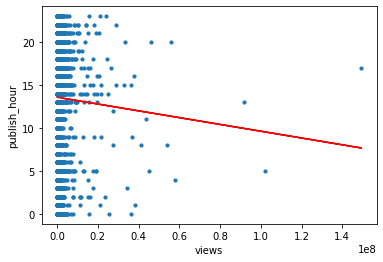

In [6]:
linear_regression(df,'views','publish_hour')

Negative slope shows that the earlier the time of the publication has higher views.

### # of Days Trending vs Tags Count

Slope: [-0.26861235]
Intercept: 20.56020425611069
Root mean squared error:  154.23503240075328
R2 score:  0.0031833039081624603


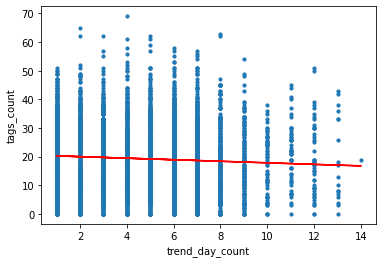

In [7]:
linear_regression(df,'trend_day_count','tags_count')

Slight negative slope could indicate that less tags leaves a video trending for longer but it is not significant.

### # of Days Trending vs Trend Tag Total

Slope: [-40.69308763]
Intercept: 636.5811465671738
Root mean squared error:  369921.9396069427
R2 score:  0.02965190782778282


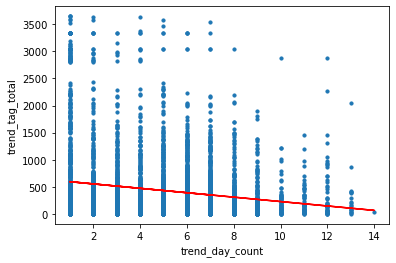

In [8]:
linear_regression(df,'trend_day_count','trend_tag_total')

### # of Days Trending vs Tag Appeared In Title Count

Slope: [-0.00808936]
Intercept: 3.0066466727001515
Root mean squared error:  6.1538570566585955
R2 score:  7.258448395486283e-05


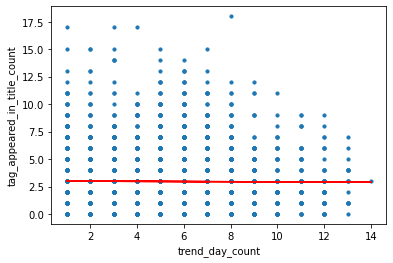

In [9]:
linear_regression(df,'trend_day_count','tag_appeared_in_title_count')

### Subscriber Count vs Trend Day Count

Slope: [-1.21315163e-08]
Intercept: 4.875956849019787
Root mean squared error:  6.822998934621821
R2 score:  0.0005031814537174162


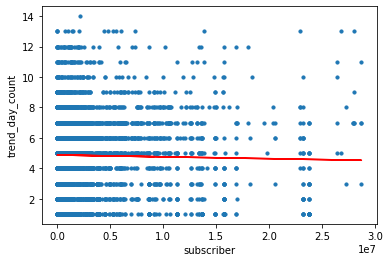

In [10]:
linear_regression(df,'subscriber','trend_day_count')

Very slight negative slope:
May imply that subscriber count is not indicative of how long a video may trend and that a channel does not need more subscribers in order to stay on the trending page for longer periods of time.

### Subscriber Count vs Days It Takes to Trend After Published

Slope: [-8.44757973e-08]
Intercept: 6.3153673040378155
Root mean squared error:  7.755817325830848
R2 score:  0.02129158101566242


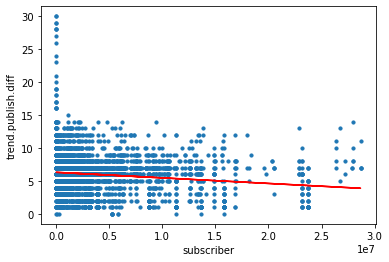

In [11]:
linear_regression(df_30ldaystrend,'subscriber','trend.publish.diff')

Slope: [-3.89954023e-06]
Intercept: 46.91059585395959
Root mean squared error:  61188.4941296641
R2 score:  0.005766783548593946


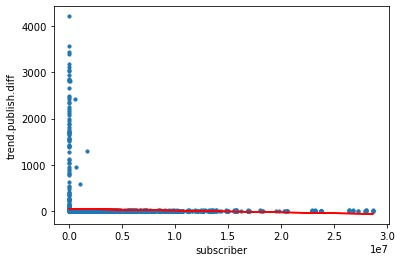

In [12]:
linear_regression(df,'subscriber','trend.publish.diff')

Slight Negative Slope: The more subscribers an individual has the less time it takes for the video to trend. Subscribers of a channel are the first to be notified of a new video posted by the channel, so it makes sense that channels with more subscribers end up trending faster.

### # of Days Trending vs Days It Takes to Trend After Published

Slope: [0.76255276]
Intercept: 2.330286827619505
Root mean squared error:  3.9418879737216024
R2 score:  0.5025722261758974


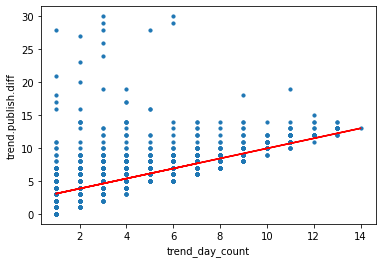

In [13]:
linear_regression(df_30ldaystrend,'trend_day_count','trend.publish.diff')

Slope: [0.59001779]
Intercept: 3.8770323413867676
Root mean squared error:  122.33378426330842
R2 score:  0.019102584214517937


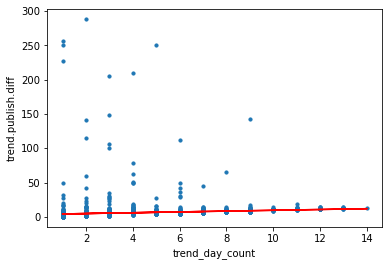

In [14]:
linear_regression(df_300ldaystrend,'trend_day_count','trend.publish.diff')

Slope: [-5.82403265]
Intercept: 62.74543085161562
Root mean squared error:  61311.85336321304
R2 score:  0.0037623569109577204


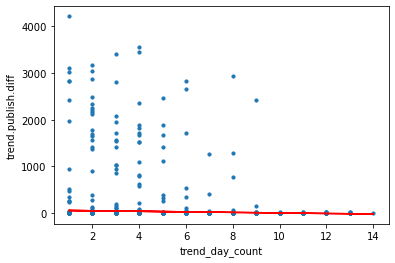

In [15]:
linear_regression(df,'trend_day_count','trend.publish.diff')